In [7]:
# Import libraries
import os
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.saving import load_model

In [8]:
# Set directories
root_dir = os.getcwd()
data_dir = os.path.join(root_dir, "mosquitoes-dataset")
model_dir = os.path.join(root_dir, "models")
test_dir = os.path.join(root_dir, "test-dataset")

In [9]:
# Class name
class_names = os.listdir(data_dir)

In [10]:
model = load_model(os.path.join(model_dir, "pretrained_model.keras"))

In [11]:
IMG_SIZE = (160, 160)
IMG_SHAPE = IMG_SIZE + (3,)

1/1 [==============================] - 0s 18ms/step


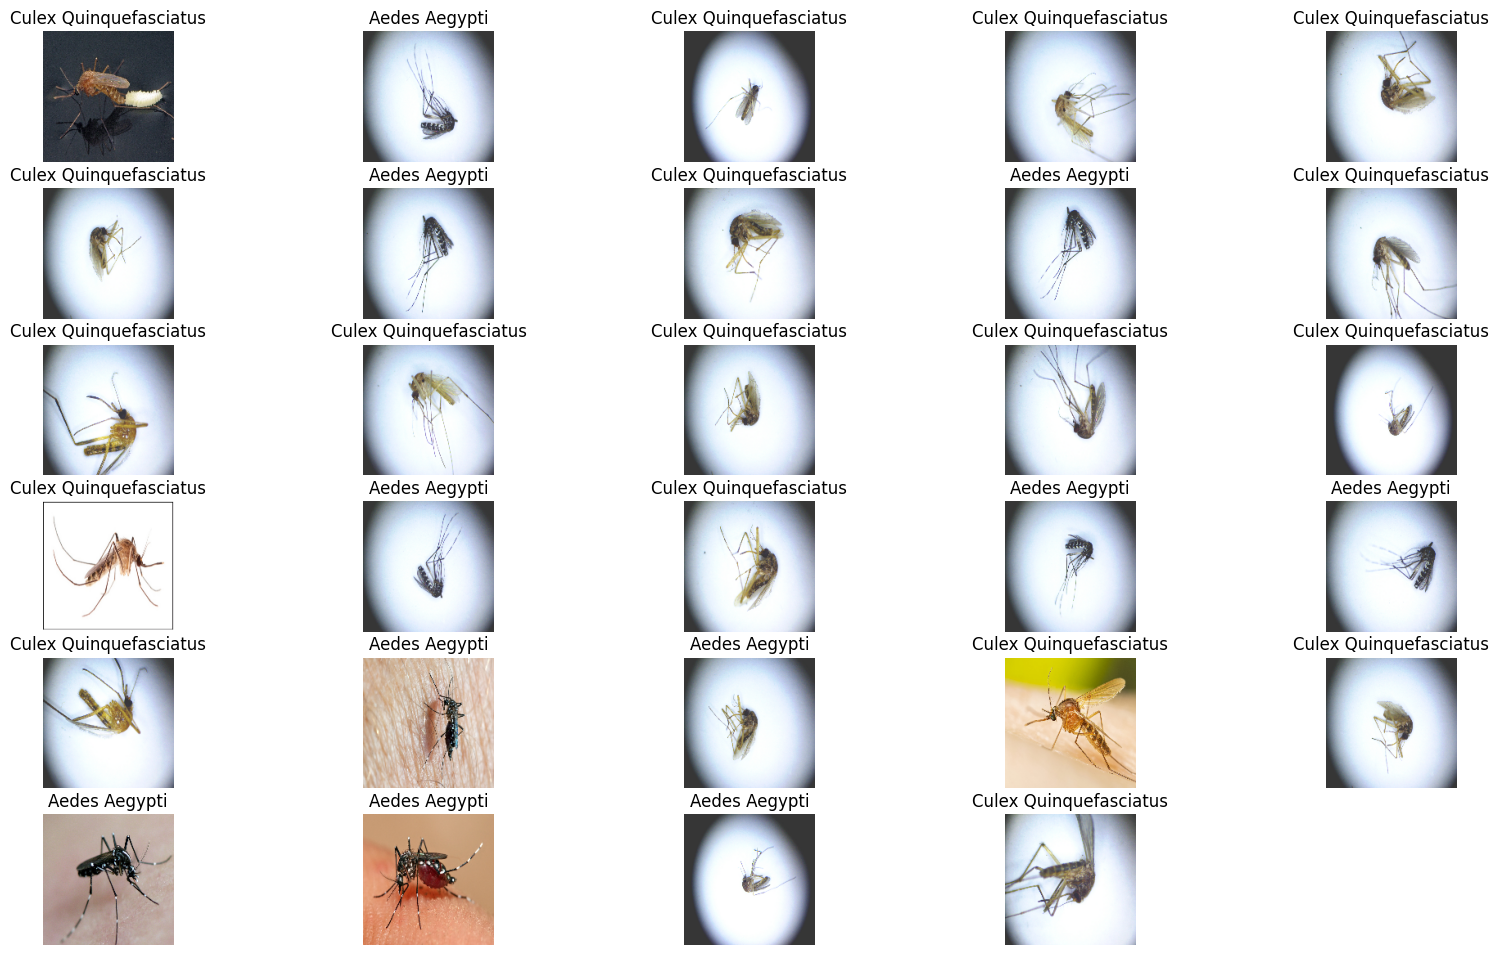

In [12]:
plt.figure(figsize=(20, 20))
for index, image in enumerate(os.listdir(test_dir)):
    img = cv2.imread(os.path.join(test_dir, image))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = tf.image.resize(img, IMG_SIZE)

    yhat = model.predict(np.expand_dims(img, 0))
    yhat = tf.nn.sigmoid(yhat[0])
    yhat = tf.where(yhat < 0.5, 0, 1)
    yhat = np.array(yhat)
    plt.subplot(10, 5, index + 1)
    plt.imshow(img.numpy().astype('uint8'))
    plt.title(class_names[yhat[0]])
    plt.axis("off")